-----------------------------------------
organic
-----------------------------------------
[[ 1.86583609e-02  1.49047425e-02 -4.80072722e-02]
 [ 3.45750352e-02  2.58305440e-02 -6.56612070e-02]
 [ 2.38608213e-02  1.67112803e-02 -3.42222485e-02]
 [-2.43366925e-02 -2.29097760e-02  1.46949185e-02]
 [-8.69692238e-03 -8.50131028e-03  4.30693220e-03]
 [-7.71371510e-03 -8.09936962e-03  4.46393652e-03]
 [ 2.01281740e-03 -3.46052641e-03  5.54960931e-03]
 [ 6.33311795e-03  2.53885110e-02  1.75560708e-02]
 [ 3.44992702e-03  6.95108539e-05 -3.44532555e-03]
 [ 8.44051831e-04 -2.54539945e-03 -1.27491492e-02]
 [ 2.37661630e-02  2.21408173e-02 -2.66059469e-03]
 [ 2.37252599e-02  1.24532649e-02 -6.56198320e-04]
 [ 3.40765010e-03  5.71686867e-03 -1.43833186e-02]
 [-1.00969393e-02 -5.87638150e-03 -1.37259082e-02]
 [-9.64187596e-04 -1.87381184e-03  3.00461622e-03]
 [-3.80987825e-03 -1.00407434e-02 -1.00045906e-02]
 [-7.18867868e-03 -4.45915177e-03 -4.75777209e-03]
 [ 1.10002450e-02  1.18461548e-03  1.8679

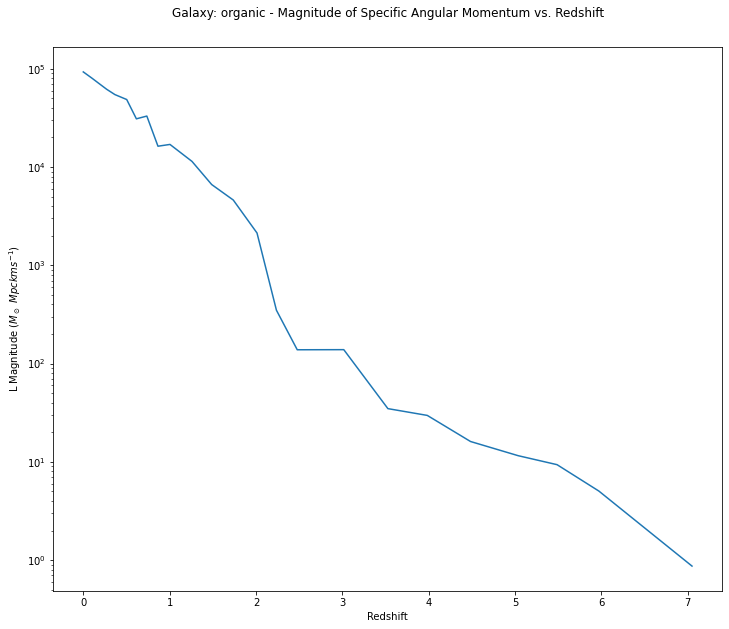

-----------------------------------------
gm_late
-----------------------------------------
[[ 9.54054813e-03  6.99584723e-03  2.16361994e-02]
 [-5.32003170e-03  4.55200042e-03 -2.10996824e-03]
 [-1.06974779e-02 -1.31763843e-02  5.05689403e-03]
 [ 5.10882799e-03  4.54202715e-03  3.23631212e-03]
 [-3.28394810e-02 -3.61823190e-02 -1.82466059e-02]
 [ 2.44058006e-03 -5.75442778e-03  5.53794168e-03]
 [ 2.92373792e-03 -2.88492604e-02  1.86059312e-03]
 [ 1.53656072e-02  2.43912070e-02 -5.78640607e-04]
 [-2.43553310e-02 -2.50072905e-02 -8.47583215e-02]
 [-6.90847267e-02  2.31627849e-03 -2.17582912e-02]
 [-1.52713308e-02 -1.39374939e-03 -1.33843604e-02]
 [ 2.17259407e-02  2.93746989e-02 -1.77335839e-02]
 [-1.33663671e-02 -1.00696157e-02  2.40242329e-02]
 [-2.51575125e-02 -6.90045911e-02  9.87318215e-03]
 [-6.35044175e-04 -6.66490596e-03  5.56212143e-03]
 [ 2.47528553e-03 -7.03619382e-03  6.17622397e-04]
 [ 6.45543657e-03 -3.09988100e-02  1.16545371e-02]
 [-1.71577292e-02  2.19728298e-02 -2.9720

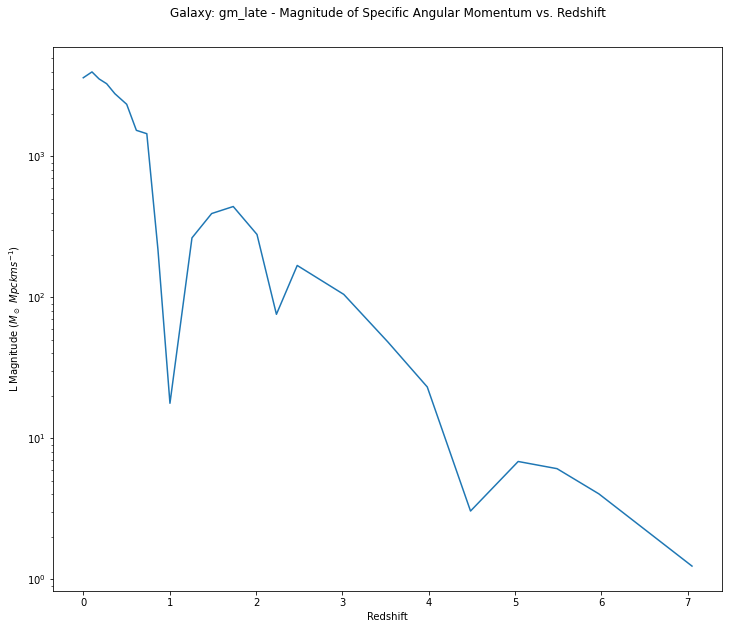

-----------------------------------------
gm_early
-----------------------------------------
[[ 4.55705041e-02  1.76775422e-02 -9.11992506e-03]
 [ 3.40697079e-04 -1.50948143e-02  2.42063050e-03]
 [ 4.53068788e-04 -5.00616708e-03  1.82281654e-03]
 [ 1.50283214e-02  1.77352689e-02 -2.28089919e-03]
 [-7.84092963e-03 -3.50213632e-03 -6.33479156e-05]
 [-7.72102600e-03 -8.31201062e-03  1.09355084e-02]
 [ 4.83163376e-02  1.21570653e-02  7.65779808e-02]
 [ 4.76072629e-03 -4.05950177e-02 -3.87029018e-02]
 [-5.32270286e-03 -2.34133945e-02 -8.51431941e-03]
 [ 1.14546640e-02  3.89212087e-02  1.94016705e-02]
 [-1.49066980e-02 -1.28117306e-02 -1.27832756e-02]
 [ 2.70854503e-04  7.46270547e-03  4.33775933e-03]
 [-3.05722673e-03  1.15087623e-02  2.84203390e-03]
 [ 6.75352340e-04 -2.39794542e-03  2.76092056e-03]
 [ 2.69309388e-02 -3.24919010e-02 -4.17136416e-02]
 [-7.81425287e-03  9.47163284e-03  1.03400492e-02]
 [ 5.64449866e-03 -9.50831132e-03 -7.12046255e-03]
 [-1.02932456e-02 -6.07809309e-03 -3.537

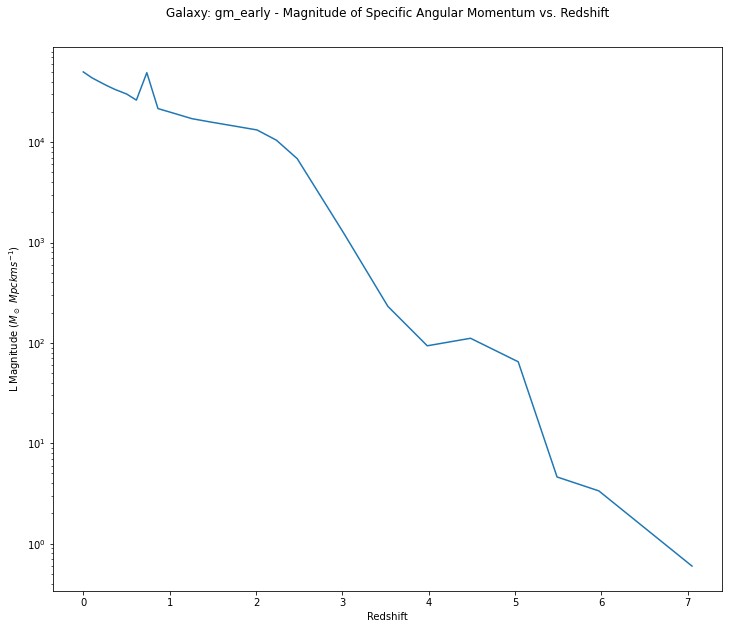

In [3]:
import h5py
import matplotlib.pyplot as plt
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_late', 'gm_early']

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('data/' + dataset)

    count = 0

    galaxyAm = np.array(range(96), dtype=float).reshape(24,4)
    
    for file in files:
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        
        redshift = float(s)
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('data/' + dataset + '/' + file,'r')

        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
        
        r = np.cross(ds_c, ds_v)
        print(r)
        #r1 = np.transpose(np.multiply(ds_m, np.transpose(r)))
        specAngMomTot = np.linalg.norm(r, axis=1)

        # Store totals of all particles for each redshift in the current galaxy
        galaxyAm[count, 0] = redshift
        galaxyAm[count, 1] = np.sum(specAngMomTot)
              
        count = count + 1
    
    # print each angular momentum component's total per redshift
    for n in range(24):
        print('Galaxy "' + dataset + '" redshift: ' + str(galaxyAm[n][3]) + '\t total:  x:' + str(galaxyAm[n][0]) + '\t y:' + str(galaxyAm[n][1]) + '\t z:' + str(galaxyAm[n][2]))
    
    plt.plot(galaxyAm[0:,0], galaxyAm[0:,1])
    plt.rcParams["figure.figsize"] = (12,10)
    plt.title('Galaxy: ' + dataset + ' - Magnitude of Specific Angular Momentum vs. Redshift', pad=30)
    plt.xlabel('Redshift')
    plt.ylabel(r'L Magnitude ($M_\odot\ Mpc km s^{-1})$')
    plt.ticklabel_format(axis='y', style='sci', useMathText=True)
    plt.semilogy()
    plt.show()    